# Import modules

In [1]:
from Model import *
from utilities import *
from sklearn.metrics import accuracy_score,confusion_matrix
from torchsummary import summary
from torch.optim import Adam
from torch.autograd import Variable
from typing import Any, Optional, Tuple
import numpy as np
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import copy
import time
import torch
import torch.nn as nn
import pandas as pd
import math
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

# Building the dataset

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model 

## Model defination

In [3]:
class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx: Any, input: torch.Tensor, coeff: Optional[float] = 1.) -> torch.Tensor:
        ctx.coeff = coeff
        output = input * 1.0
        return output

    @staticmethod
    def backward(ctx: Any, grad_output: torch.Tensor) -> Tuple[torch.Tensor, Any]:
        return grad_output.neg() * ctx.coeff, None
def grad_reverse(x, coeff):
    return GradReverse.apply(x, coeff)

class Net(nn.Module):
    def __init__(self,input_dim):
        super(Net, self).__init__()
        self.generator = CNN_2D()
        self.classifier = CLS(1024,input_dim)
    def forward(self, x, constant = 1, adaption = False):
        x = self.generator(x)
        if adaption == True:
            x = grad_reverse(x, constant)
        x = self.classifier(x)
        return x
def bce_loss(output, target):
    output_neg = 1 - output
    target_neg = 1 - target
    result = torch.mean(target * torch.log(output + 1e-6))
    result += torch.mean(target_neg * torch.log(output_neg + 1e-6))
    return -torch.mean(result)    

## Model initialization

In [4]:
task_num = 1
setGPU('0')
log = Logger('./log/OSBP/', clear=True)
data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(task_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
src_train_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
tgt_train_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
src_test_loader=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
tgt_test_loader=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)
num_class = Y_0.shape[1]-1
discriminator = LargeAdversarialNetwork(1024).cuda()
feature_extractor = CNN_2D().cuda()
cls = CLS(1024, num_class+1).cuda()
model = Net(input_dim =Y_1.shape[1]).cuda()

gpu(s) to be used: ['0']



## Model training

In [5]:
scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)
def bce_loss(output, target):
    output_neg = 1 - output
    target_neg = 1 - target
    result = torch.mean(target * torch.log(output + 1e-6))
    result += torch.mean(target_neg * torch.log(output_neg + 1e-6))
    return -torch.mean(result)
warnings.filterwarnings("ignore")
num_class = Y_1.shape[1]
optimizer = OptimWithSheduler(optim.Adam(model.parameters(), lr=4e-4, weight_decay=5e-4),scheduler)
criterion_bce = nn.BCELoss()
criterion_cel = nn.CrossEntropyLoss()
best_prec1 = 0
best_pred_y = []
best_gt_y = []
step = 0
threshold = 0
constant = 0.5
train_step = 150
while step <train_step:
    for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(src_train_loader,tgt_train_loader)):
        _,_,predict_prob_source = model(im_source.cuda())
        _,_,predict_prob_target = model(im_target.cuda(), constant = constant, adaption = True)
        loss_cel = criterion_cel(predict_prob_source.cuda(),torch.argmax(label_source.cuda(),axis =1))
        out_t = F.softmax(predict_prob_target)
        prob1 = torch.sum(out_t[:, :num_class - 1], 1).view(-1, 1)
        prob2 = out_t[:, num_class - 1].contiguous().view(-1, 1)
        prob = torch.cat((prob1, prob2), 1)
        target_funk = Variable(torch.FloatTensor(im_target.size()[0], 2).fill_(0.5).cuda())
        loss_adv = bce_loss(prob,target_funk)

        step += 1
        with OptimizerManager([optimizer]):
            loss = loss_cel+ 0.5 * loss_adv 
            loss.backward()      
        step += 1
        if step % 10 == 1:
            counter = AccuracyCounter()
            counter.addOntBatch(variable_to_numpy(predict_prob_source), variable_to_numpy(label_source))
            acc_train = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            counter.addOntBatch(variable_to_numpy(predict_prob_target), variable_to_numpy(label_target))
            acc_test = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            track_scalars(log, ['loss_cel','loss_adv', 'acc_train','acc_test'], globals())
        torch.save(model.state_dict(), './models/Compared_Methods_OSBP.pkl')

# Performance visualization

## The confusion matrix

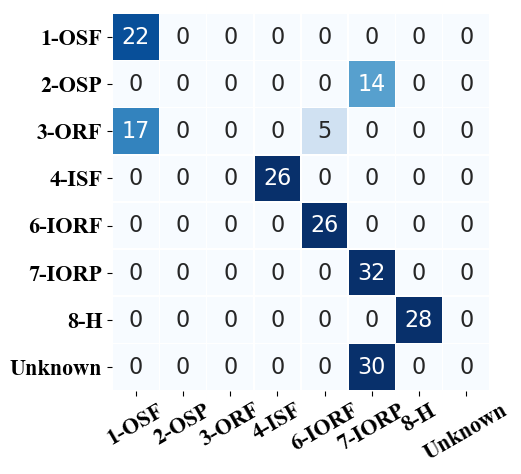

In [6]:
net_path = './models/Compared_Methods_OSBP.pkl'
model.load_state_dict(torch.load(net_path))

True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(tgt_test_loader):

    ss, _,  predict_prob = model.forward(im.cuda())
    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)
    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))

y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))

m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=100)
ax= sns.heatmap(m,vmin=0, vmax=25,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

plt.margins(0, 0)

## The accuracy

In [7]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tgt_test_loader):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = model(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.67
The accuracy on all the target classes: 0.788235294117647
